___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Случайные леса (Random Forest) - Регрессия
## А также сравнительный анализ различных методов регрессии!

## Данные

Вас только что наняла на работу буровая компания, которая применяет рентгеновские лучи для определения плотности камня. Задача в том, чтобы вовремя менять буровые головки прежде, чем переходить к бурению камня!

<img src='boring.jpg' height=400>

Компания представила Вам результаты лабораторных тестов - в них измеряется отражённый сигнал, полученный сенсорами на разных частотах в герцах, для различной плотности камня. Оказалось, что если отобразить эти результаты на графике, то мы получим синусоиду - с изменением плотности камня уровень отражённого сигнала меняется волнообразно...

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [180]:
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

In [181]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

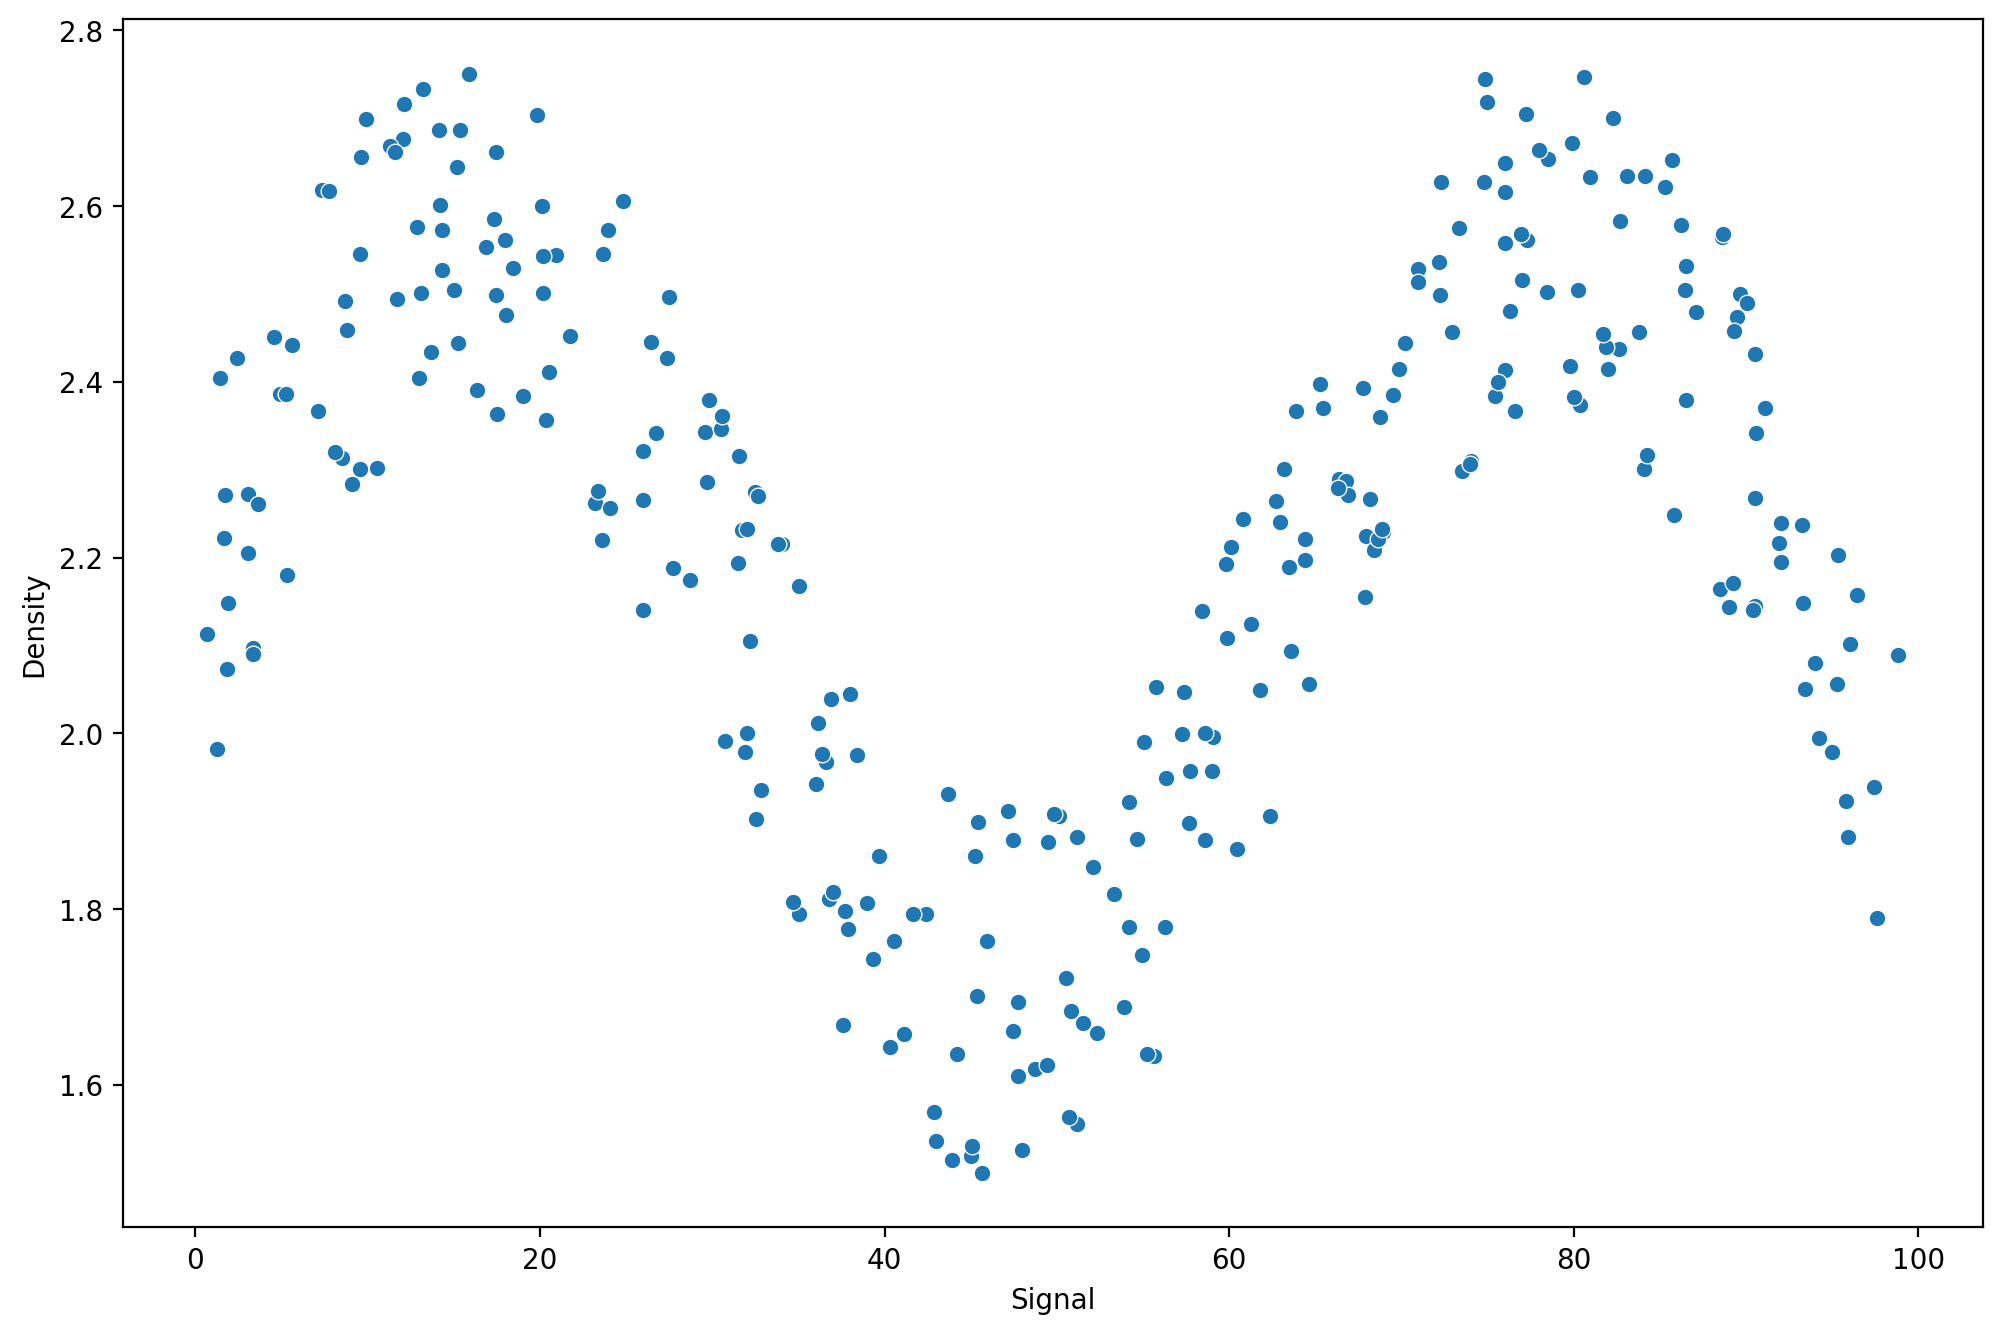

In [182]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Разбиение данных на обучающий и тестовый наборы 

Разбиение нужно для последующей оценки модели на тестовом наборе данных.

In [198]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Линейная регрессия

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
lr_model = LinearRegression()

In [203]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [204]:
lr_preds = lr_model.predict(X_test)

In [205]:
from sklearn.metrics import mean_squared_error

In [206]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

Как выглядит эта линия?

In [208]:
signal_range = np.arange(0,100)

In [210]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

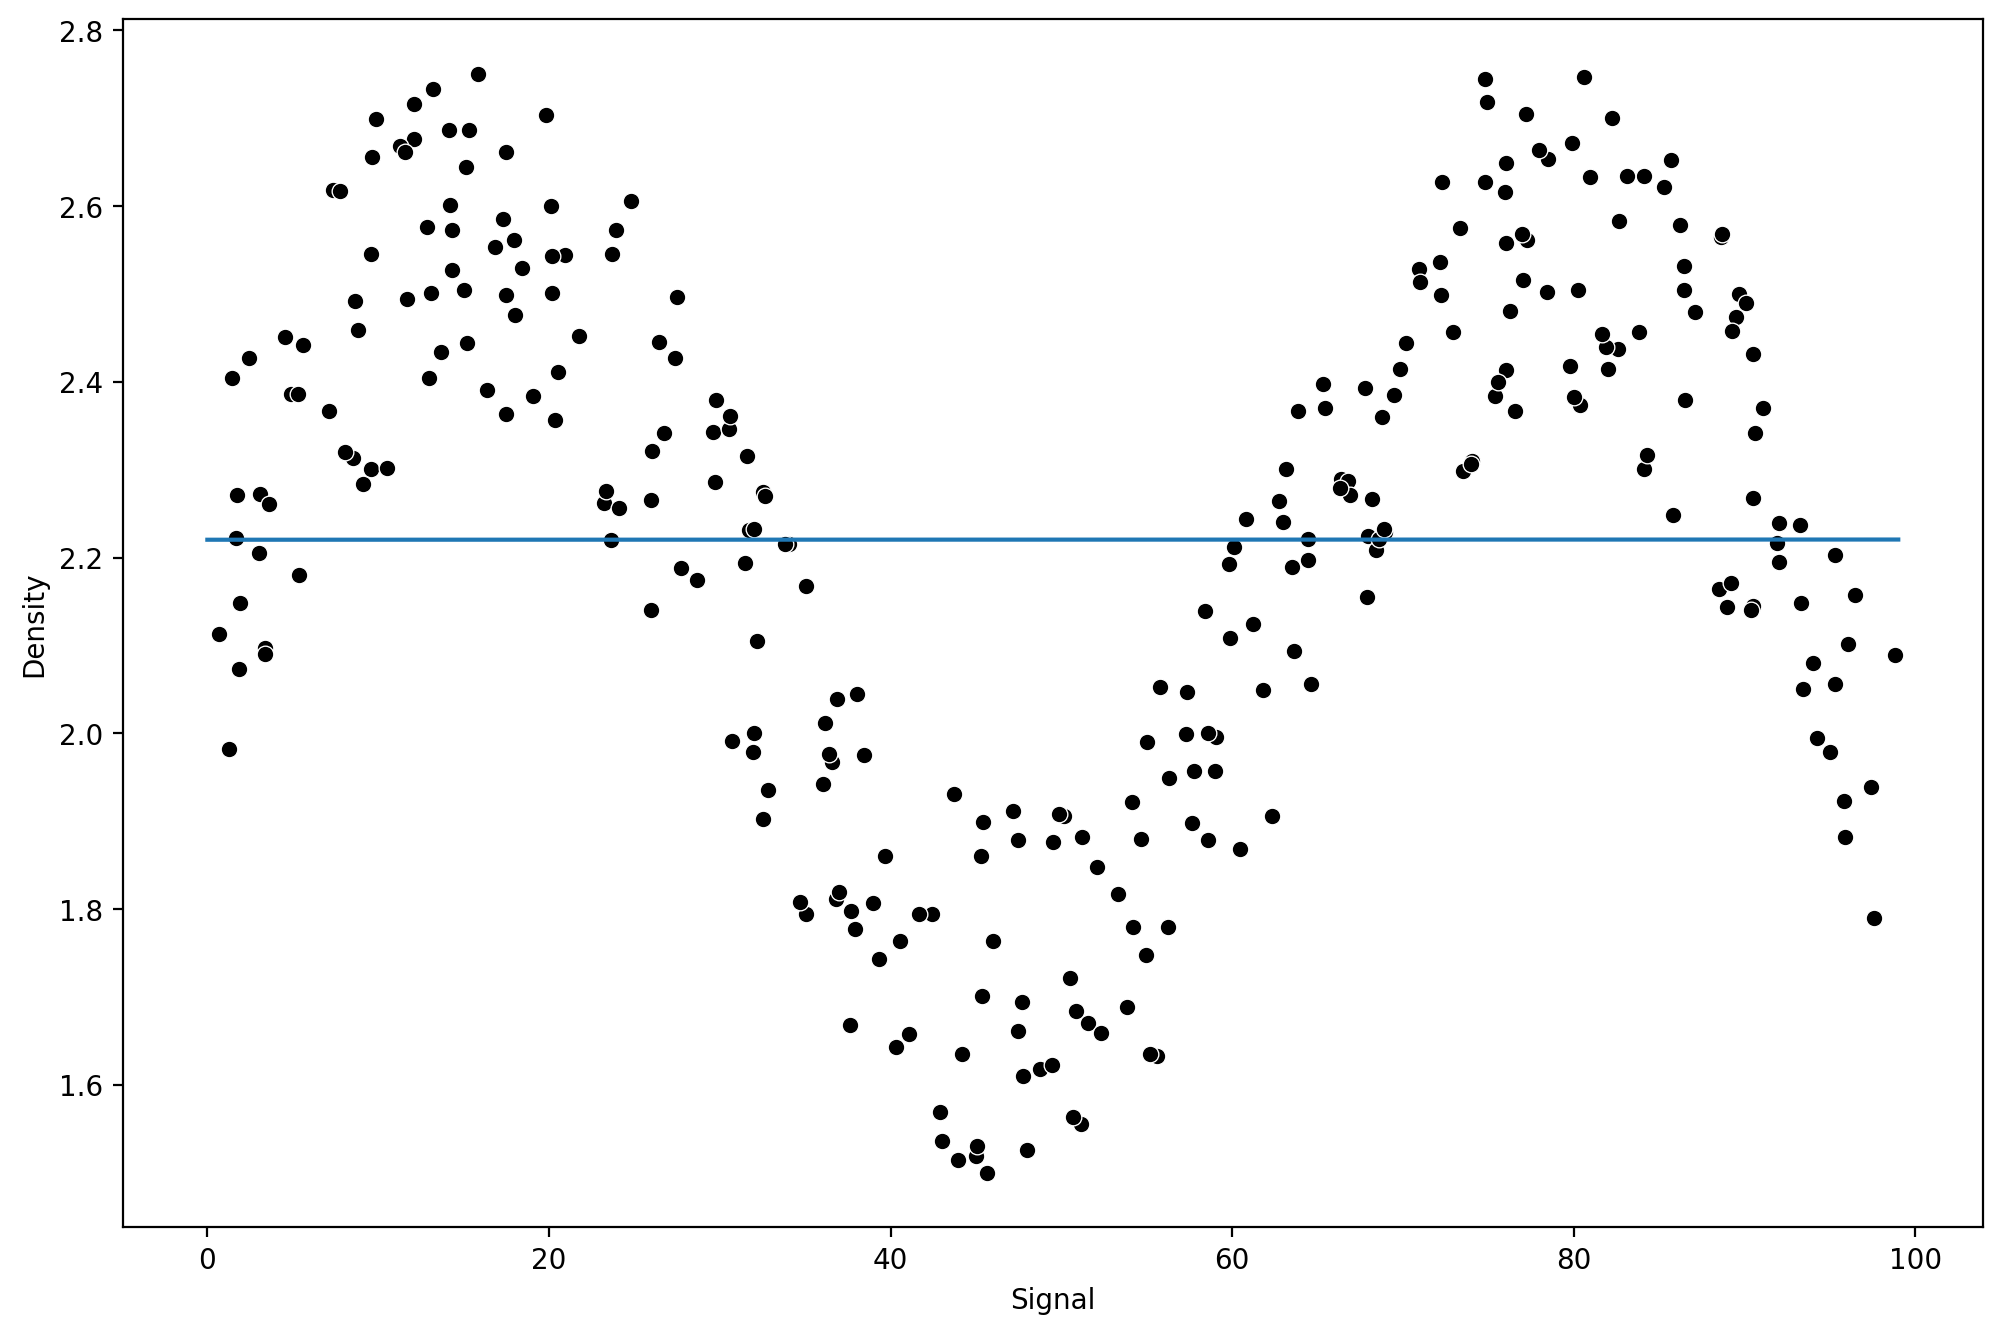

In [214]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Полиномиальная регрессия

## Попытка применить модель полиномиальной регрессии

Посмотрим, почему стандартный подход полиномиальной модели здесь будет затруднителен. И обратите внимание, что здесь нам ещё повезло - мы можем легко визуализировать результаты по осям y и x.

## Вспомогательная функция для запуска моделей

In [296]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [298]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Обучение модели
    model.fit(X_train,y_train)
    
    # Вычисление метрик
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Рисуем график с результатами
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


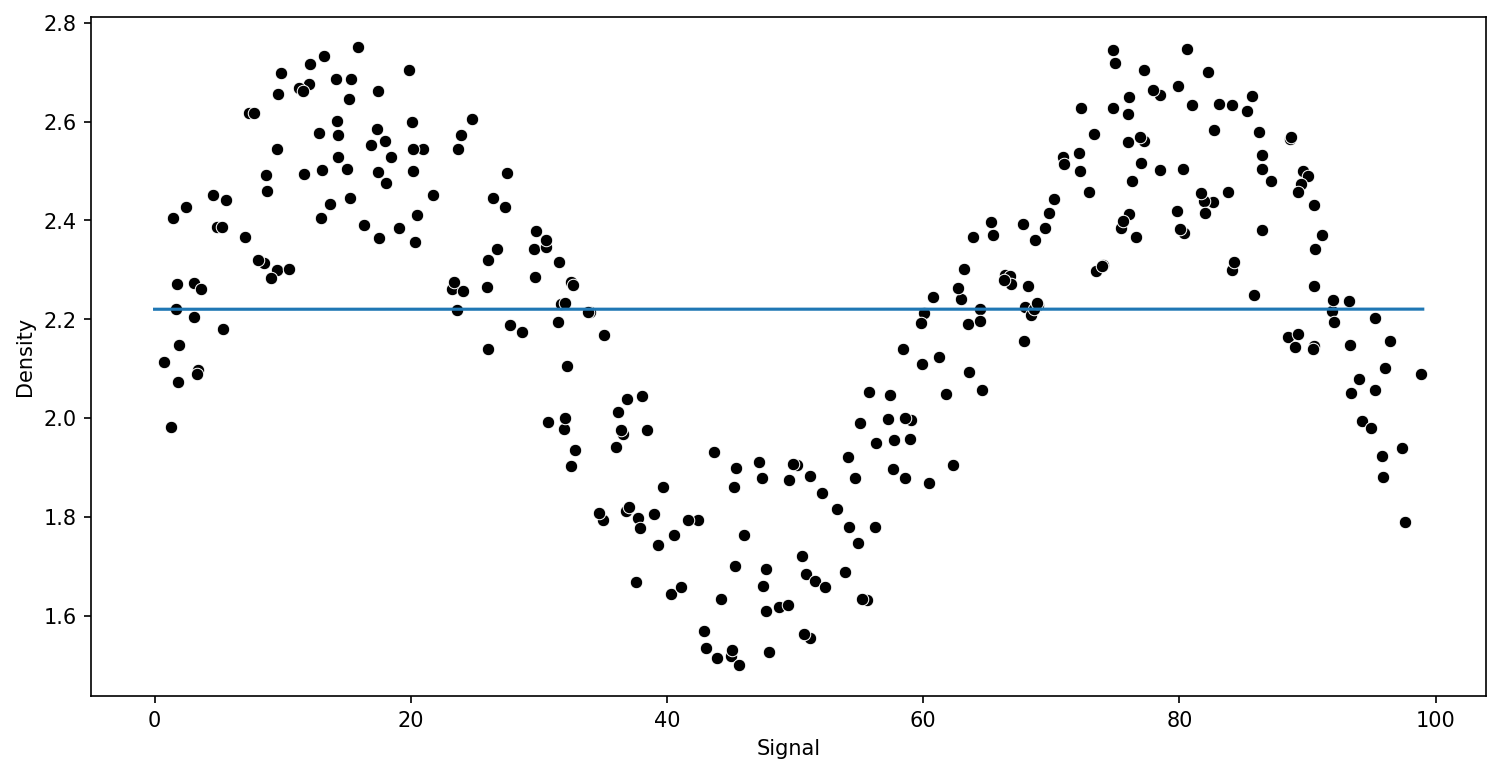

In [299]:
run_model(model,X_train,y_train,X_test,y_test)

## Пайплайн для степеней полинома

In [268]:
from sklearn.pipeline import make_pipeline

In [269]:
from sklearn.preprocessing import PolynomialFeatures

In [270]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725596


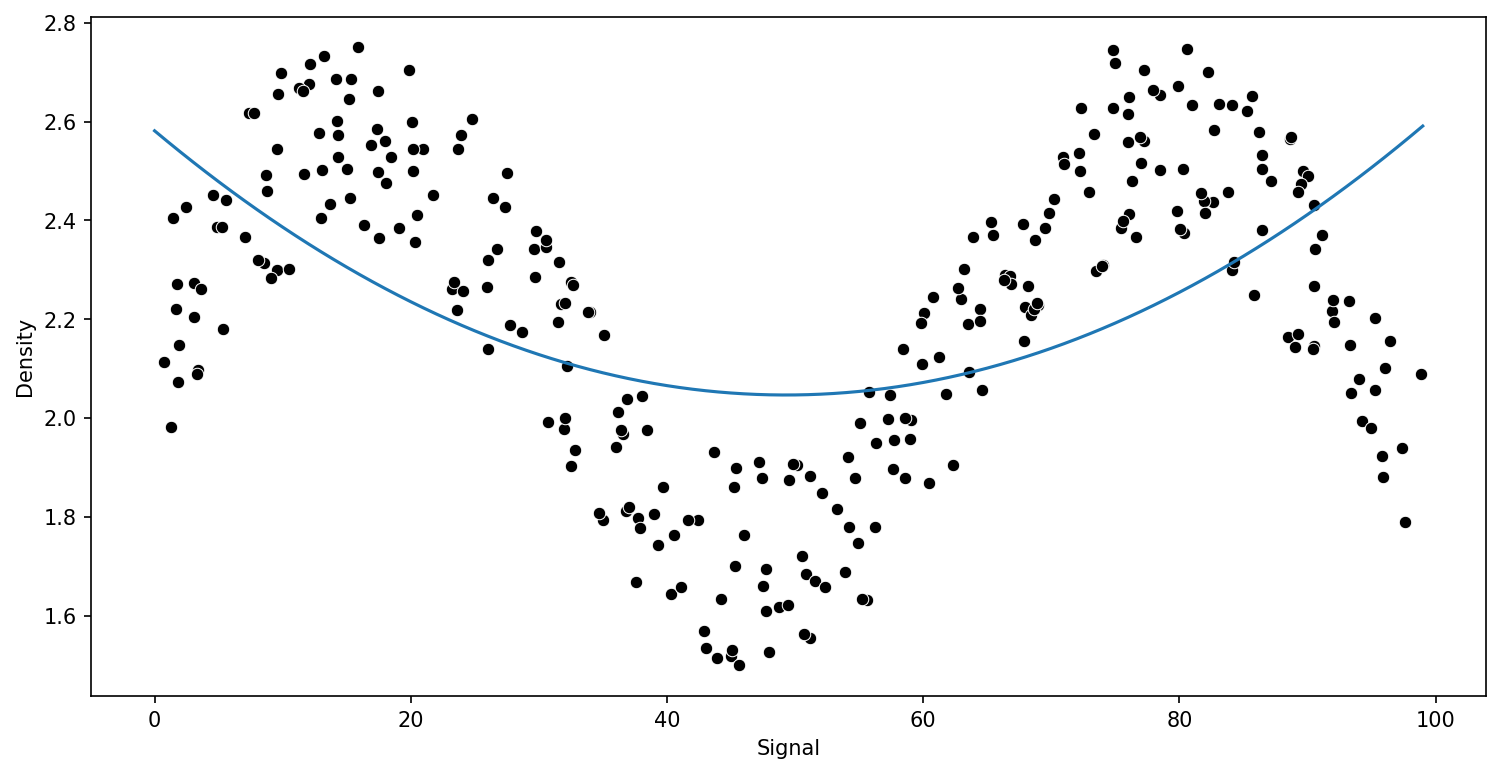

In [271]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Сравнение различных степеней полинома

RMSE : 0.1417947898442399


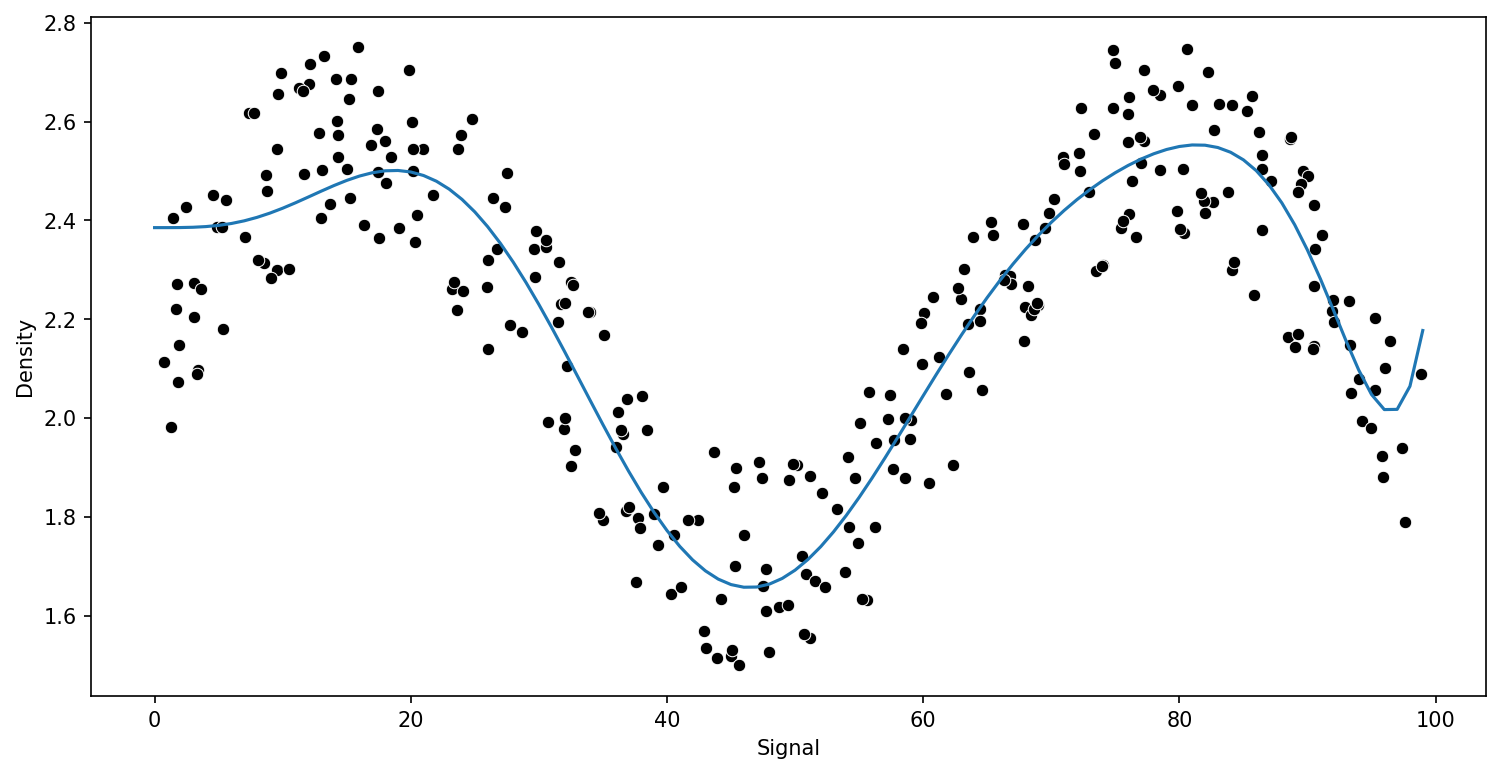

In [272]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## Регрессия KNN 

In [273]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


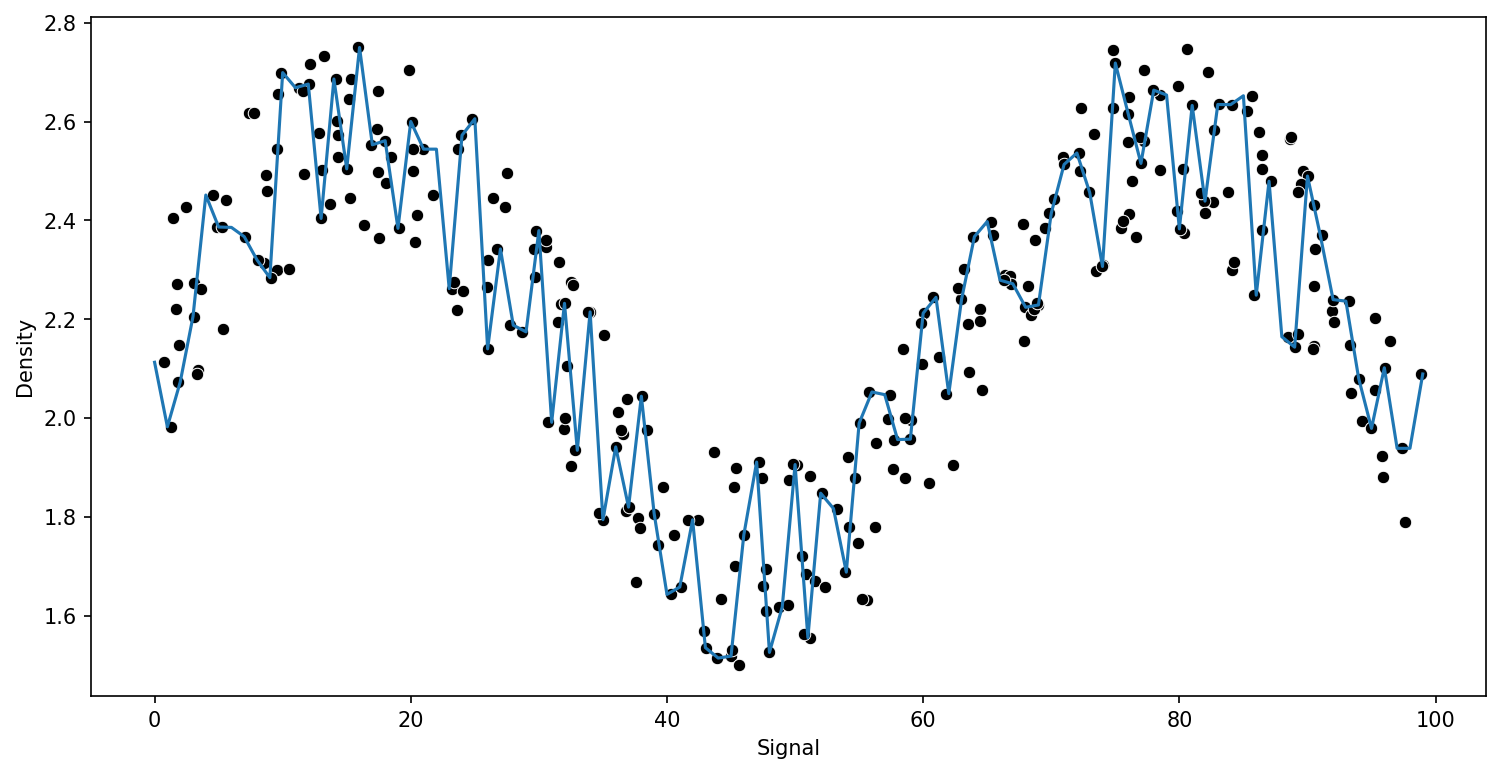

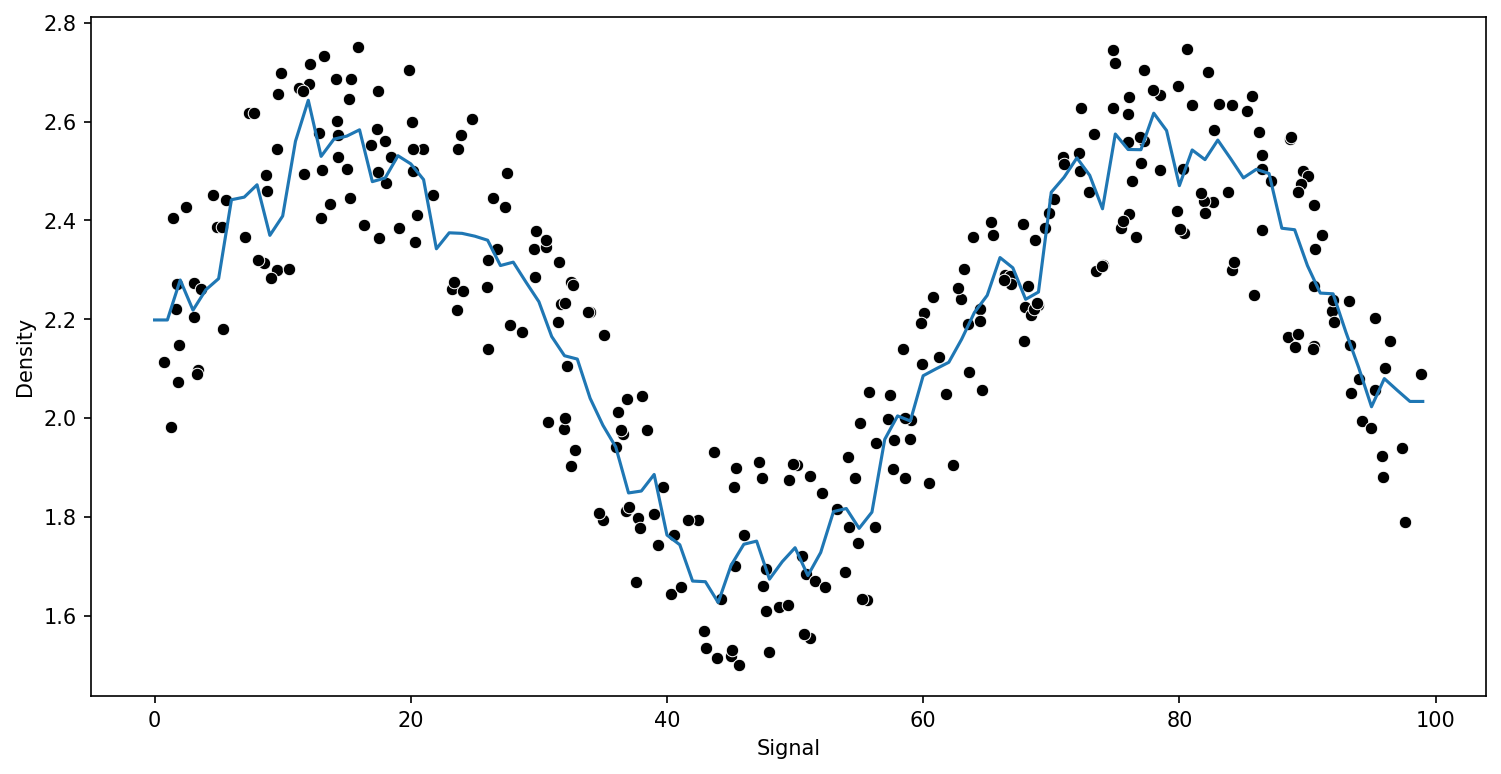

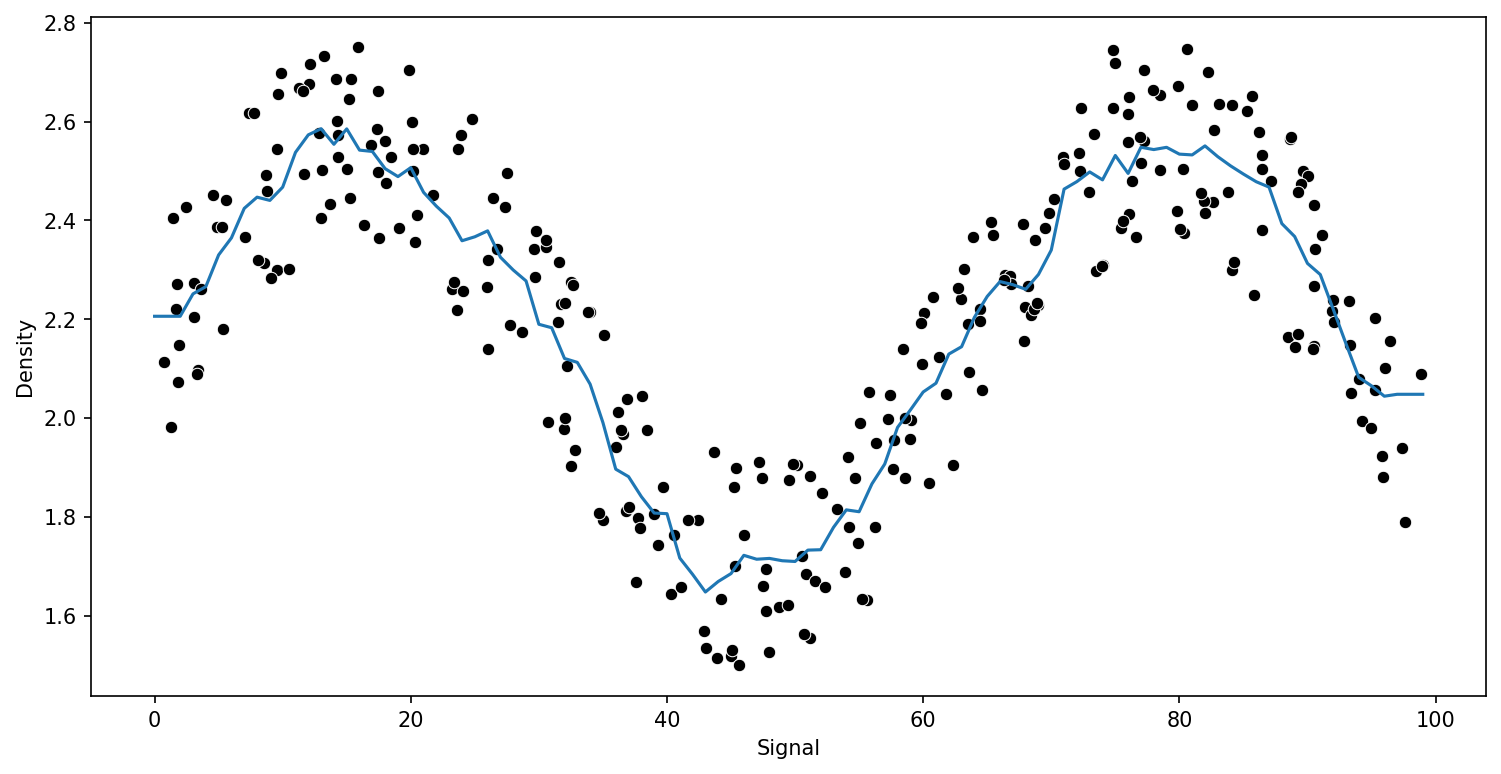

In [274]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Деревья решений для регрессии

In [275]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.15234870286353372


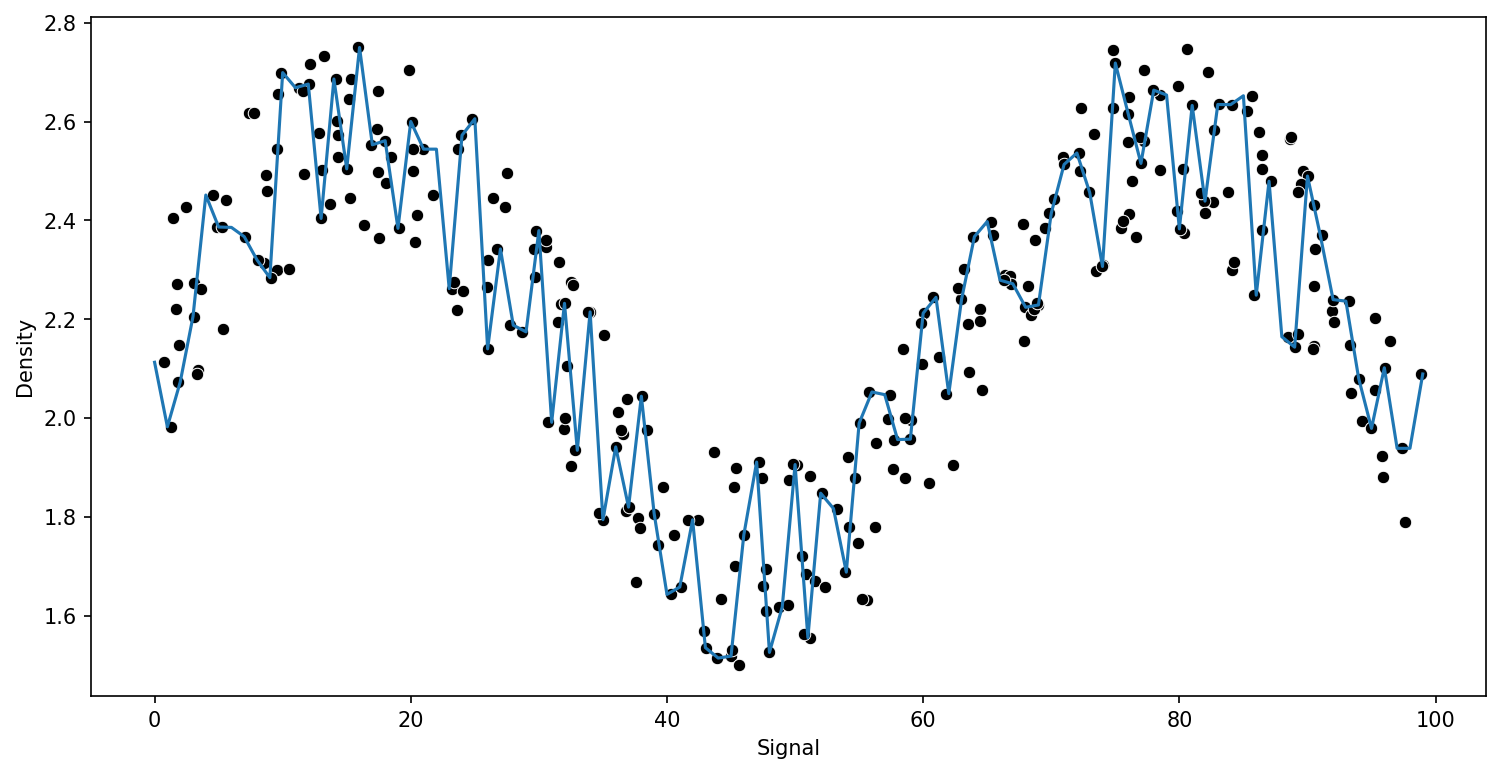

In [276]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [277]:
model.get_n_leaves()

270

----

## Метод опорных векторов для регрессии

In [282]:
from sklearn.svm import SVR

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [285]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12634668775105407


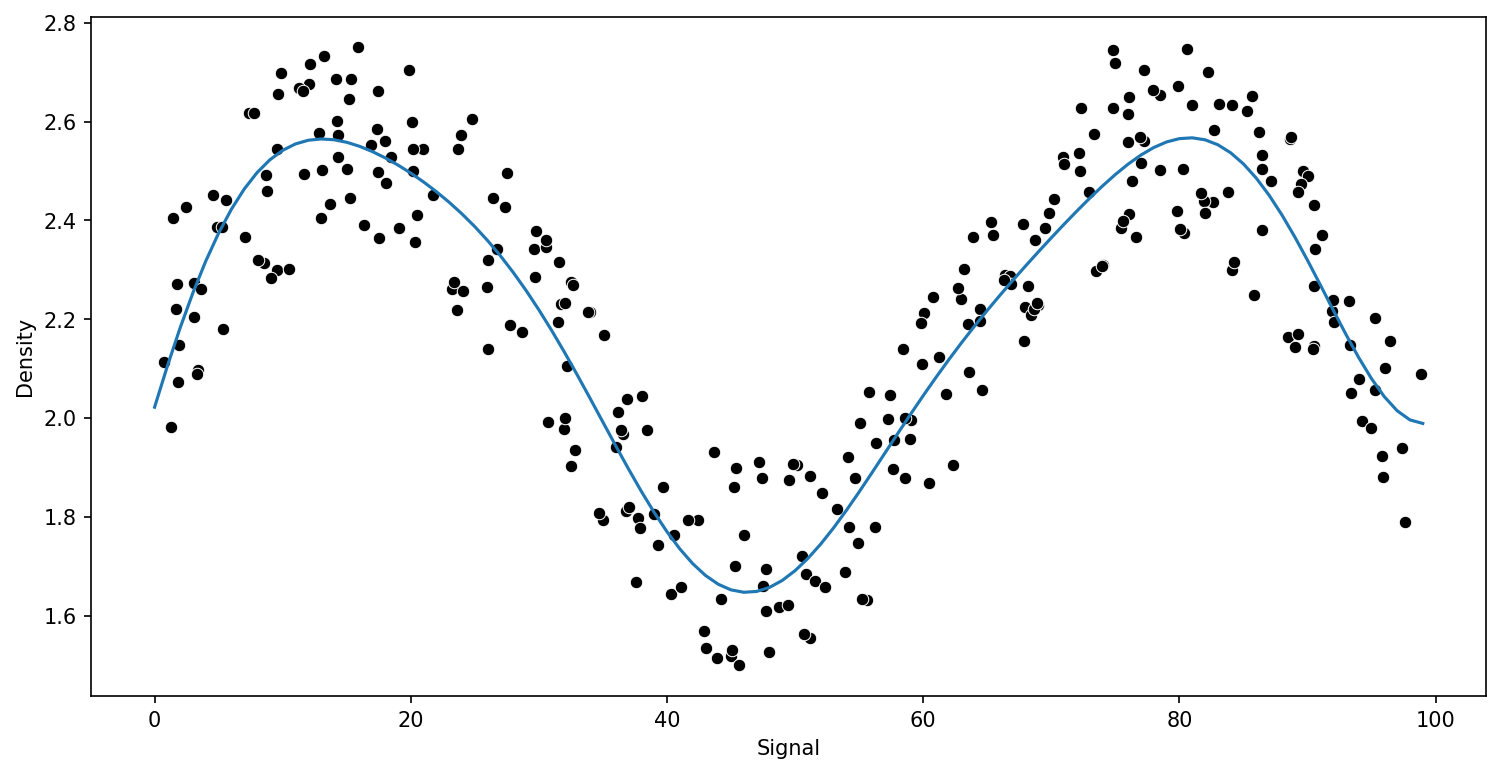

In [286]:
run_model(grid,X_train,y_train,X_test,y_test)

In [287]:
grid.best_estimator_

SVR(C=1000)

---

## Случайные леса для регрессии

In [288]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
# help(RandomForestRegressor)

RMSE : 0.1417613358931285
RMSE : 0.133281449397454
RMSE : 0.13699094997283662


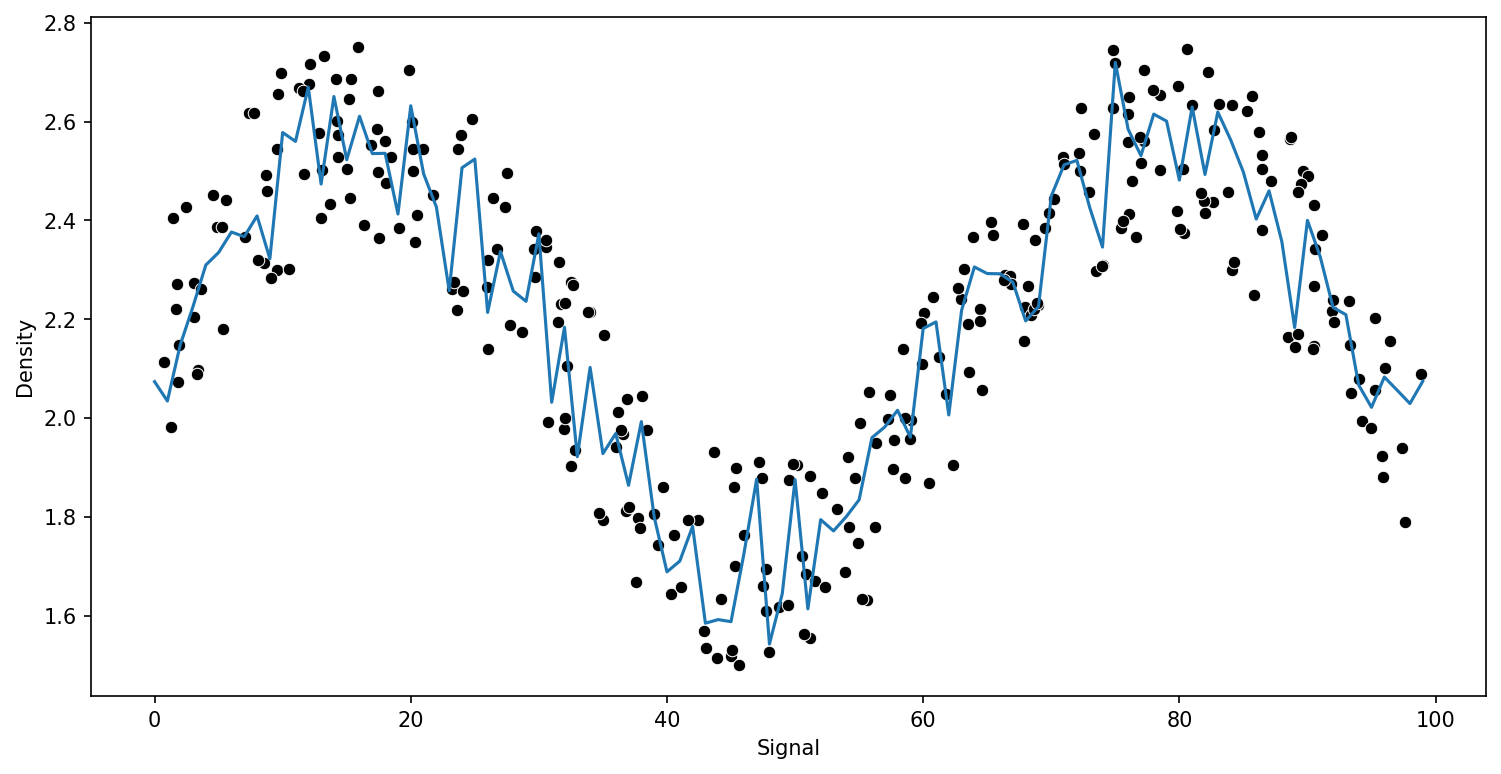

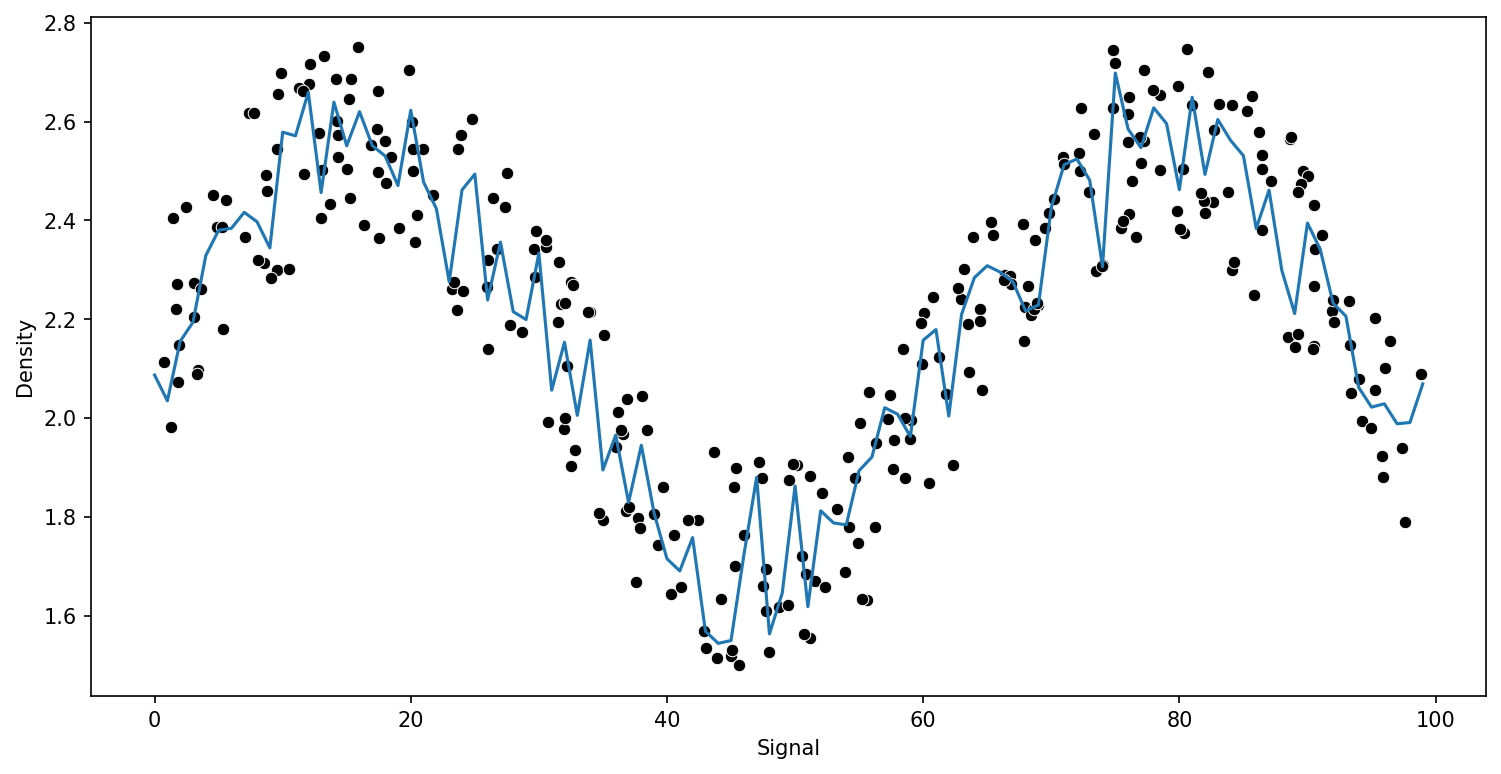

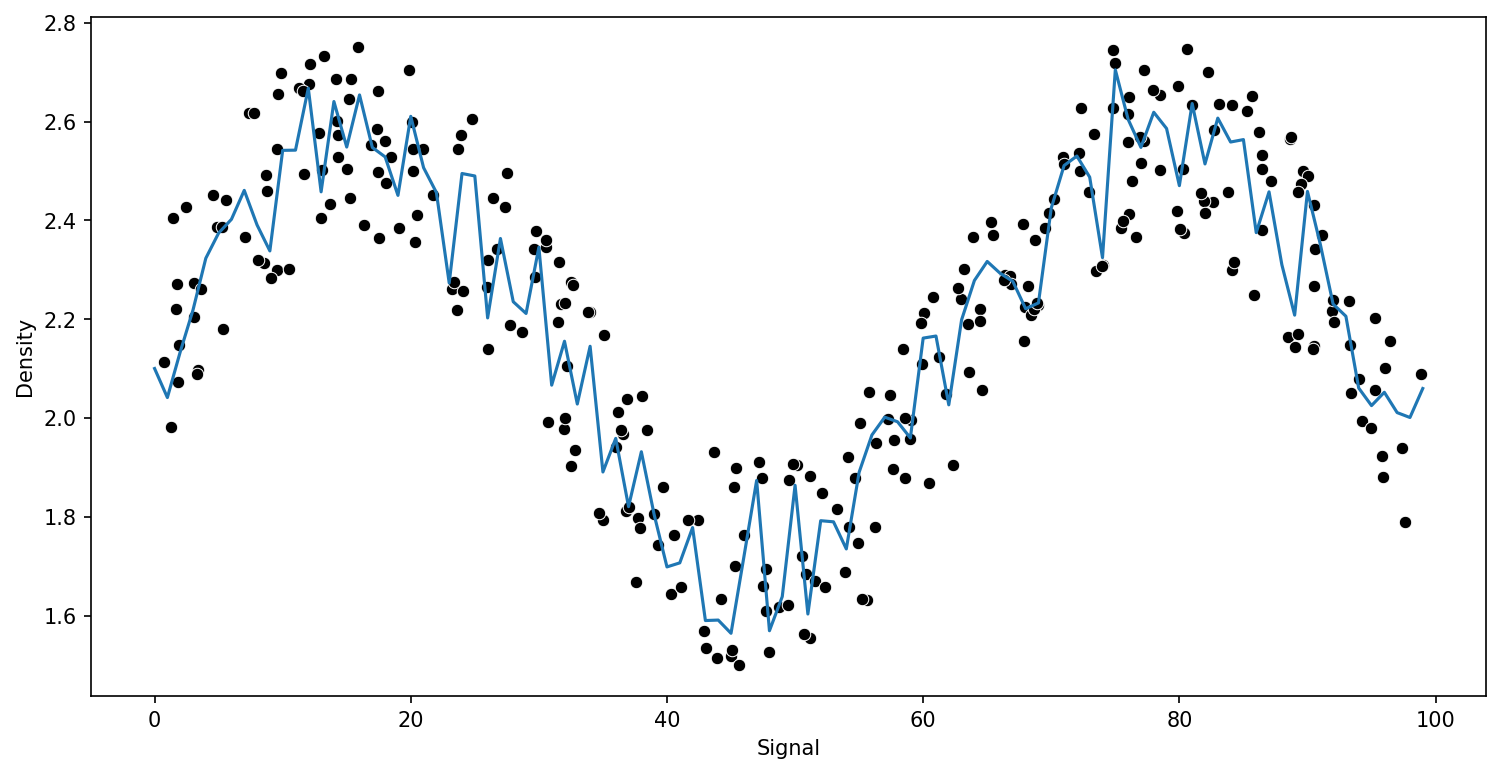

In [290]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Градиентный бустинг

Мы изучим этот метод более подробно в следующем разделе.

In [291]:
from sklearn.ensemble import GradientBoostingRegressor

In [292]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


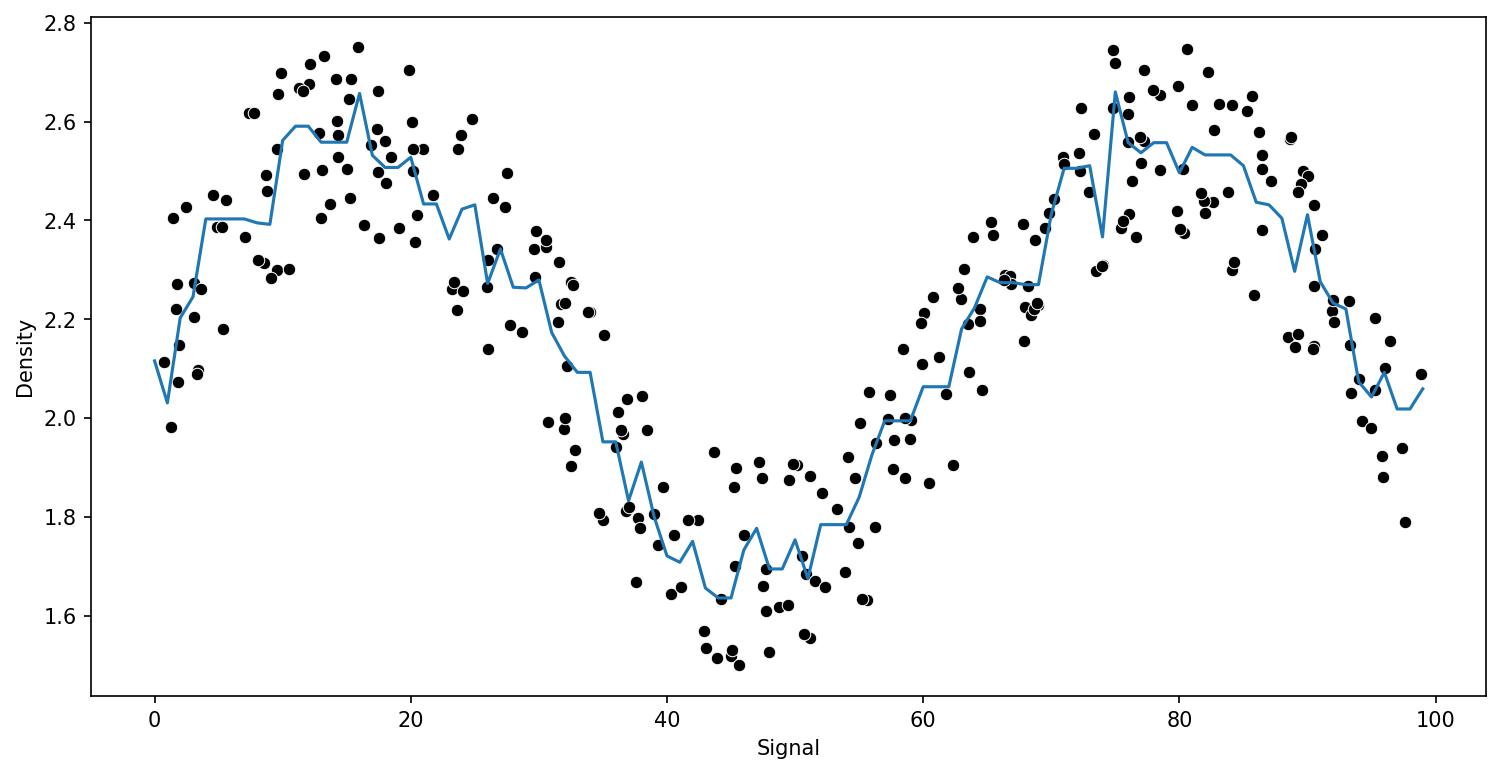

In [293]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [294]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


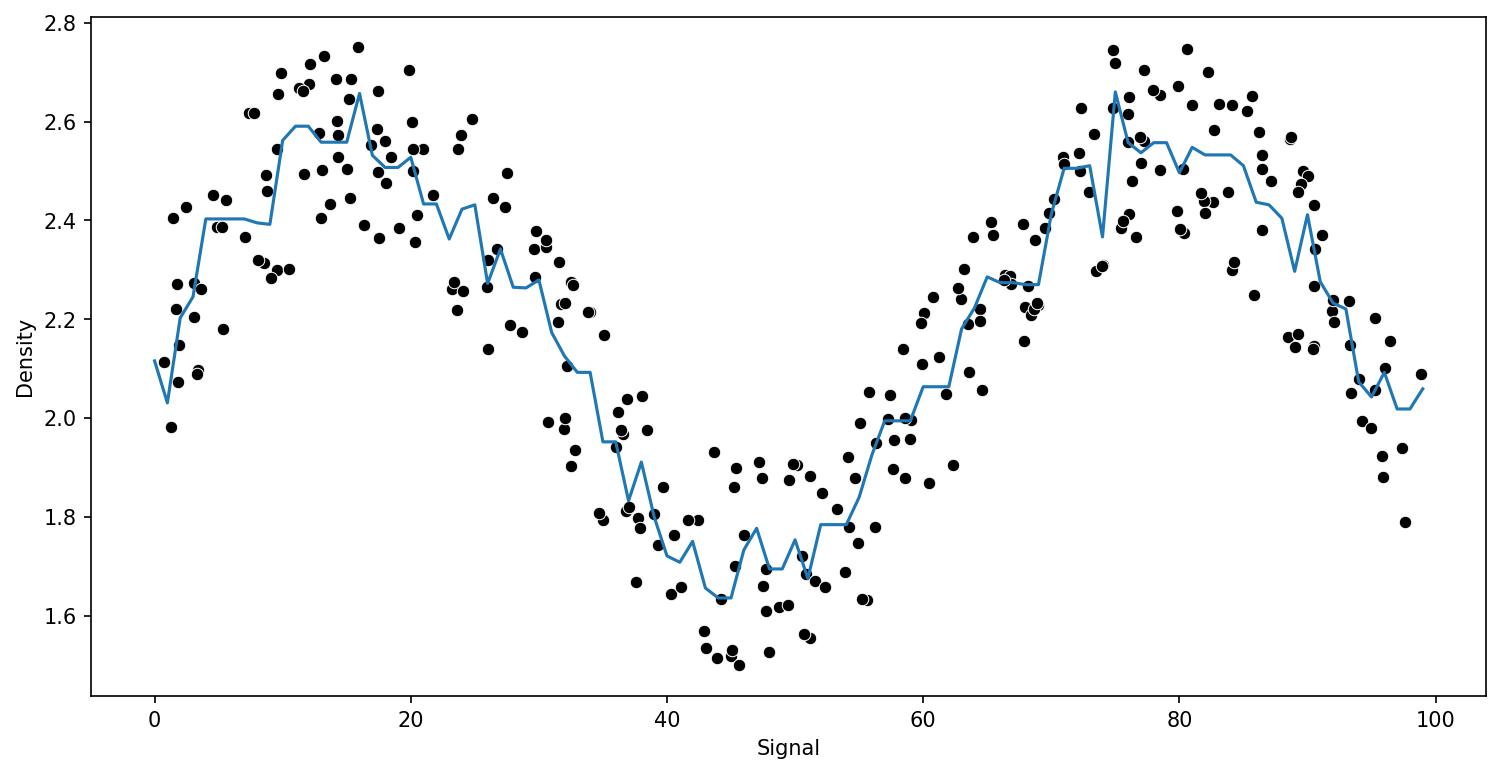

In [295]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----